Tutorial for using trackpy:
http://soft-matter.github.io/trackpy/v0.3.0/tutorial/walkthrough.html

In [2]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from skimage import filters

In [4]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

Original (base) Image we do detection on

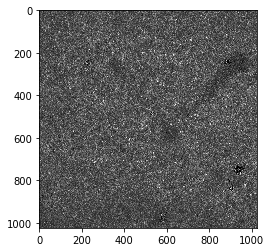

In [5]:
tp1 = pims.open('../data/R04_t001.tif')
background = tp1[1].clip(-2500, 10000)
plt.imshow(background)

Predicted Synapses from PLoS - threshold 0.9

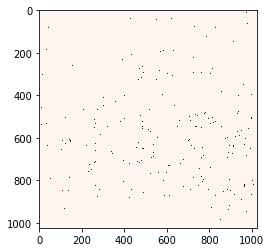

In [6]:
thresh = filters.threshold_otsu(frames[0])
plt.imshow(np.array(frames[0]) > thresh, cmap='Reds')

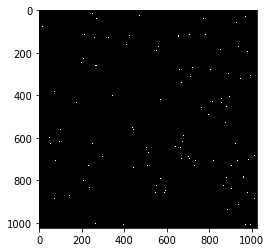

In [7]:
thresh = filters.threshold_otsu(frames[1])
plt.imshow(np.array(frames[1]) > thresh)

Detecting "features" in the predicted synapses. Second argument is estimated size of features in pixels

In [8]:
f = tp.locate(frames[1], 7)
#detect features

In [9]:
f.head(10) # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
1,9.000000,902.000000,867.621009,1.025227,0.299290,199.855670,1438.0,0.0,1
2,11.448216,474.000000,3535.703985,1.344999,0.049888,530.738222,7195.0,0.0,1
3,13.788933,864.562931,5854.338465,1.573161,0.167871,631.676966,12960.0,0.0,1
4,14.999900,550.000000,870.229807,1.025786,0.298987,200.333950,1441.0,0.0,1
5,16.000000,251.000000,871.121146,1.025894,0.298950,200.486129,1442.0,0.0,1
6,18.000000,65.000000,872.838605,1.026244,0.298816,200.812229,1444.0,0.0,1
7,17.995435,228.000273,876.208302,1.029211,0.294932,201.007889,1455.0,0.0,1
8,18.000000,572.000000,874.556063,1.026544,0.298683,201.138329,1446.0,0.0,1
9,20.231898,265.286967,2996.748050,1.275611,0.365140,477.366562,5788.0,0.0,1
10,20.000000,723.000000,876.251782,1.026856,0.298518,201.442689,1448.0,0.0,1


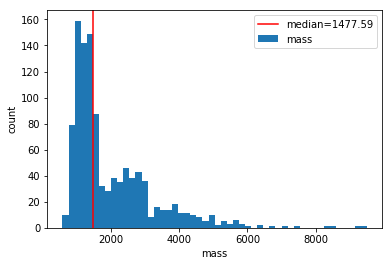

In [10]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=50)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')
plt.axvline(x=np.median(f['mass']), color='red', label='median={:.2f}'.format(np.median(f['mass'])))
plt.legend()

In [11]:
f = tp.locate(frames[1], 7, percentile=0.99)
f = tp.locate(frames[1], 7, minmass=np.median(f['mass']), percentile=0.99)

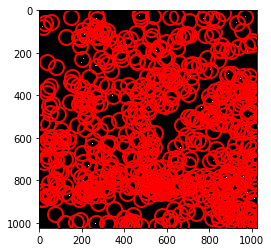

In [12]:
plt.figure()
tp.annotate(f, frames[1])

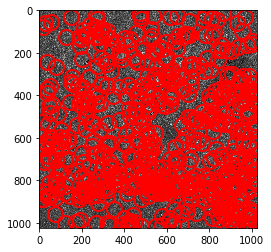

In [13]:
plt.figure()
tp.annotate(f, background)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e8fca940>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

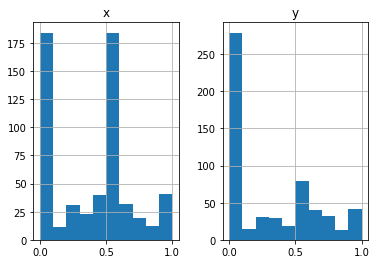

In [14]:
plt.figure()
tp.subpx_bias(f)

In [15]:
f = tp.batch(frames, 15, minmass=1000, percentile=0.95)

Frame 3: 781 features


In [16]:
t = tp.link_df(f, 10, memory=0)

Frame 3: 781 trajectories present.


In [17]:
t.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
562,631.000000,964.500000,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
563,632.000000,10.000000,2941.912381,1.275975,0.213163,516.918165,3336.0,0.000062,0,3
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
569,634.874383,982.950832,2910.907814,1.653611,0.199838,517.403877,3339.0,0.000062,0,9


In [193]:
t1 = tp.filter_stubs(t, 1)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2403
After: 2403


In [19]:
pd.concat(g for _, g in t.groupby("particle") if len(g) == 1)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
570,635.737877,221.245050,11170.912813,1.636147,0.197180,1114.666773,13752.0,0.000015,0,10
571,636.000000,716.500000,5795.020560,1.433458,0.301496,825.506693,6684.0,0.000031,0,12
573,637.000000,671.500000,5799.230057,1.433580,0.301466,825.992405,6688.0,0.000031,0,13


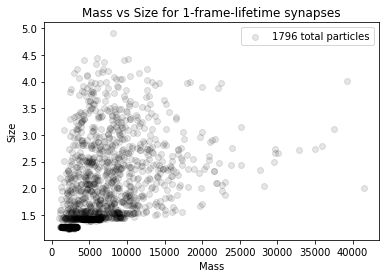

In [20]:
plt.figure()
plt.title('Mass vs Size for 1-frame-lifetime synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 1)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/1_frame_lifetime.png')

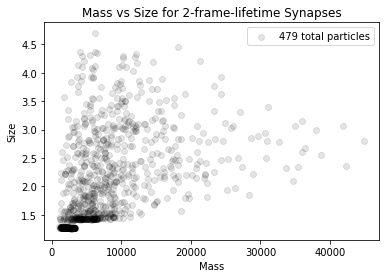

In [21]:
plt.figure()
plt.title('Mass vs Size for 2-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 2)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/2_frame_lifetime.png')

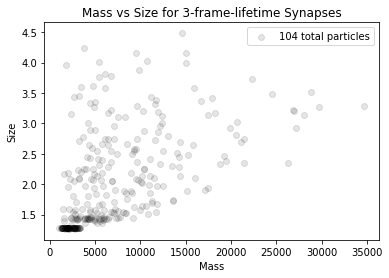

In [22]:
plt.figure()
plt.title('Mass vs Size for 3-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 3)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/3_frame_lifetime.png')

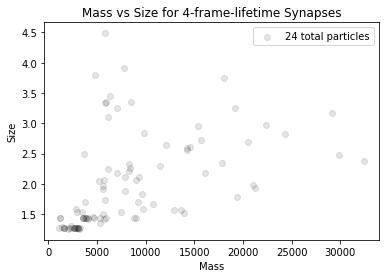

In [23]:
plt.figure()
plt.title('Mass vs Size for 4-frame-lifetime Synapses')
plt.xlabel('Mass')
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) == 4)
count = len(df.particle.unique())
plt.scatter(df['mass'], df['size'], c='k', alpha=0.1, label="{} total particles".format(count))
plt.legend()
plt.savefig('../figures/4_frame_lifetime.png')

In [24]:
t.loc[t['particle'] == 2]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
562,631.0,964.5,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
1302,623.0,960.5,3065.787884,1.671601,0.416869,327.834424,3680.0,0.000000,1,2


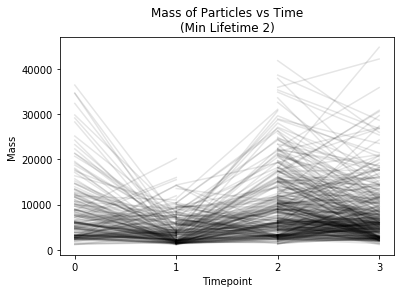

In [25]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Min Lifetime 2)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 1)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_2.png')

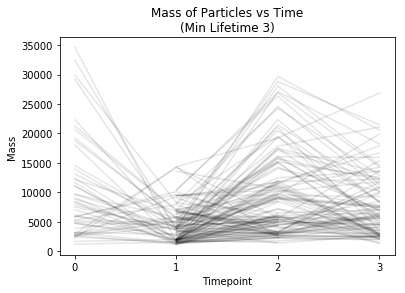

In [26]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Min Lifetime 3)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 2)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_3.png')

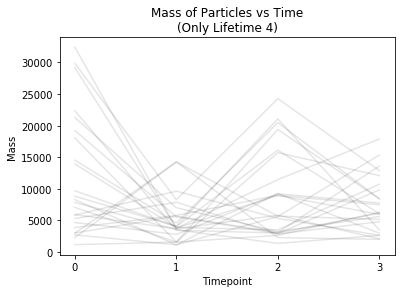

In [27]:
plt.figure()
plt.title("Mass of Particles vs Time\n(Only Lifetime 4)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Mass')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 3)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['mass'], 'k-', alpha=0.1)
    
plt.savefig('../figures/mass_vs_time_min_lifetime_4.png')

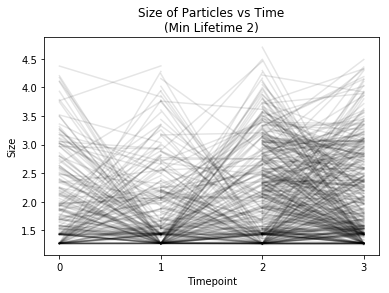

In [28]:
plt.figure()
plt.title("Size of Particles vs Time\n(Min Lifetime 2)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 1)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_2.png')

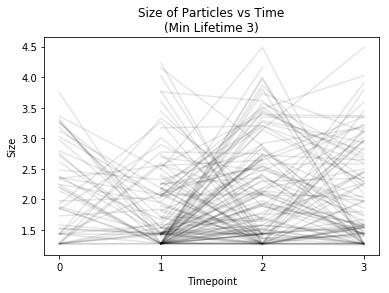

In [29]:
plt.figure()
plt.title("Size of Particles vs Time\n(Min Lifetime 3)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 2)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_3.png')

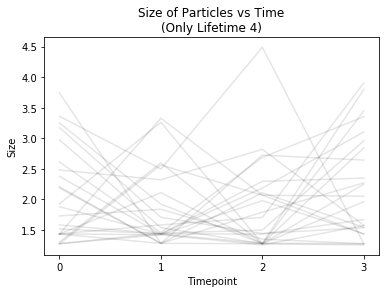

In [30]:
plt.figure()
plt.title("Size of Particles vs Time\n(Only Lifetime 4)")
plt.xlabel('Timepoint')
plt.xticks(np.arange(4))
plt.ylabel('Size')
df = pd.concat(g for _, g in t.groupby("particle") if len(g) > 3)
for i in df.particle.unique():
    df1 = t.loc[t['particle'] == i]
    plt.plot(df1['frame'], df1['size'], 'k-', alpha=0.1)
    
plt.savefig('../figures/size_vs_time_min_lifetime_4.png')

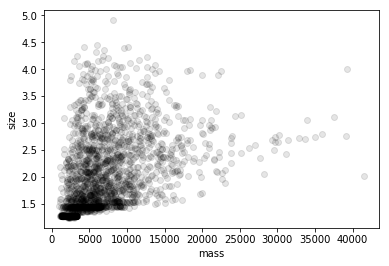

In [31]:
plt.figure()
tp.mass_size(t.groupby('particle').mean())  # convenience function -- just plots size vs. mass

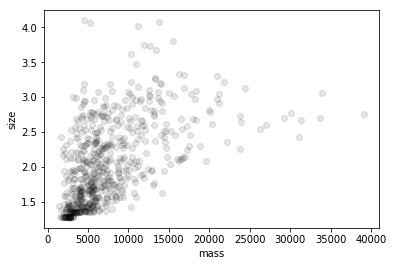

In [32]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())  # convenience function -- just plots size vs. mass

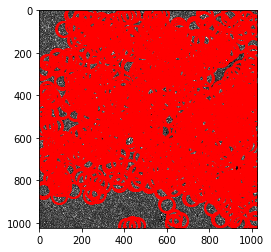

In [33]:
plt.figure()
tp.annotate(t1, background)

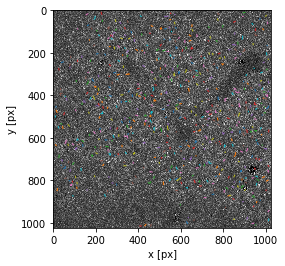

In [34]:
plt.figure()
tp.plot_traj(t1, superimpose=background)

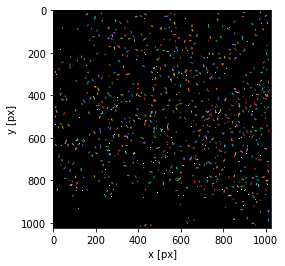

In [35]:
plt.figure()
tp.plot_traj(t1, superimpose=frames[0])

In [36]:
d = tp.compute_drift(t1)

/home/dli/anaconda2/envs/lids/lib/python3.6/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


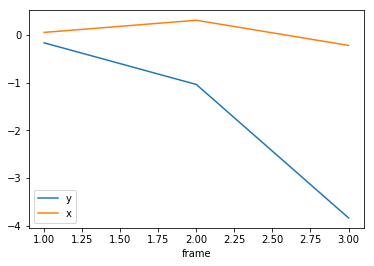

In [37]:
d.plot()

In [38]:
tm = tp.subtract_drift(t1, d)

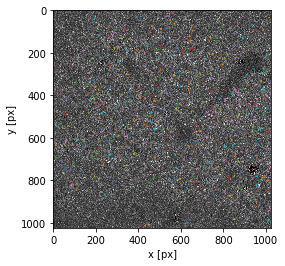

In [39]:
plt.figure()
tp.plot_traj(tm, superimpose=background)

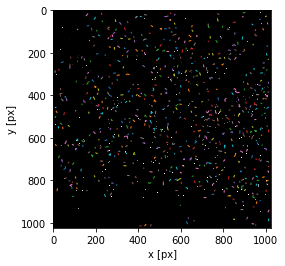

In [40]:
plt.figure()
tp.plot_traj(tm, superimpose=frames[0])

In [41]:
im = tp.imsd(tm, 0.09, 1)  # microns per pixel = 0.09., frames per second = 24

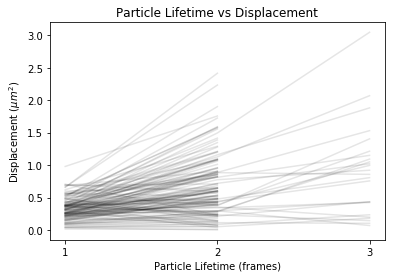

In [42]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(title='Particle Lifetime vs Displacement',
       ylabel=r'Displacement $(\mu m^2)$',
       xlabel='Particle Lifetime (frames)')
ax.set_xticks(np.arange(1, 4, 1.0))


In [213]:
mass_f0 = t[t['frame']==0].sort_values(by=['mass'], ascending=False)

In [214]:
mass_f0.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
520,585.667965,287.125633,41492.609494,2.005932,0.136566,2652.590398,55607.0,0.000004,0,173
757,823.065099,965.502844,39277.847284,4.003384,0.605709,1267.827711,62972.0,0.000003,0,249
620,688.365482,537.535568,37493.384740,3.118516,0.180850,1446.002776,71536.0,0.000003,0,59
614,678.973276,306.693260,36473.714986,2.674773,0.368960,2053.182277,54336.0,0.000004,0,64
492,556.376741,485.447402,35923.687506,2.797635,0.306776,1186.025846,57408.0,0.000004,0,199
827,938.181335,891.128797,34687.350073,2.103592,0.068671,2004.732583,49180.0,0.000004,0,277
540,603.428478,424.490233,34641.450363,3.279073,0.221785,1083.905062,59957.0,0.000003,0,33
443,507.481241,996.469280,32918.551715,2.720119,0.174161,1029.464930,52972.0,0.000004,0,149
546,610.746485,110.237797,32409.607309,2.377266,0.085690,2365.696971,46306.0,0.000004,0,39
508,571.342776,933.388246,29847.763958,2.480593,0.202121,1264.427732,42784.0,0.000005,0,161


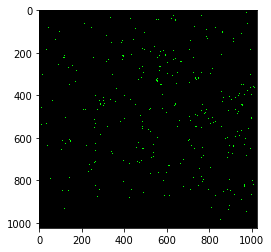

In [95]:
im = np.stack([np.zeros(frames[0].shape), frames[0]>0, np.zeros(frames[0].shape)], axis=2)
plt.imshow(im)

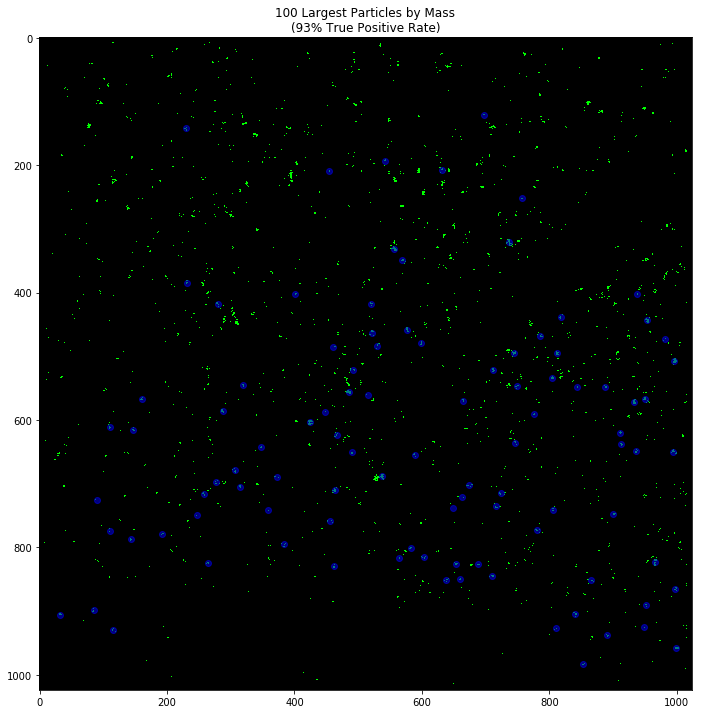

In [167]:
plt.figure(figsize=(20,12))
plt.title("100 Largest Particles by Mass\n(93% True Positive Rate)")
plt.scatter(mass_f0['x'][:100], mass_f0['y'][:100], alpha=0.5, c=[0,0,1])#, s=mass_f0['size'][:100])
plt.imshow(im)
plt.savefig("../figures/top_100_mass.PNG")

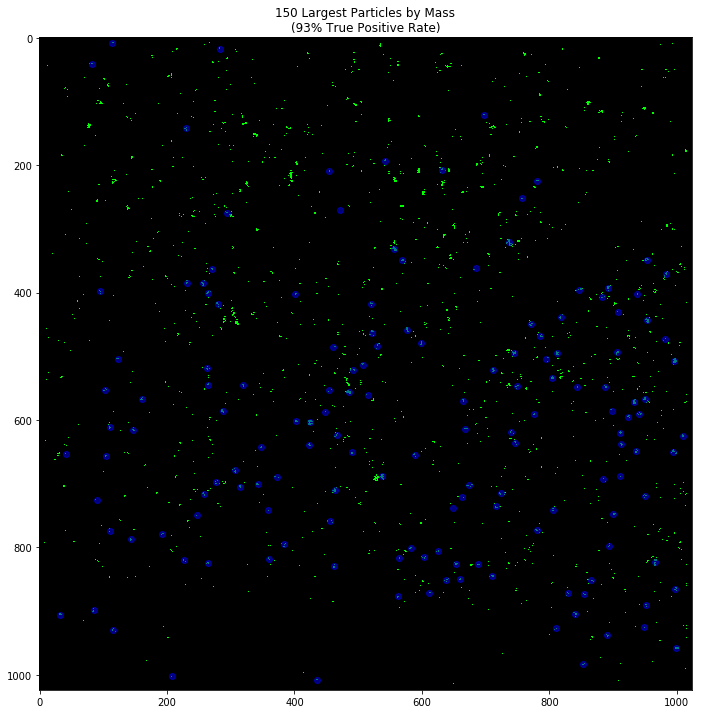

In [168]:
plt.figure(figsize=(20,12))
plt.title("150 Largest Particles by Mass\n(93% True Positive Rate)")
plt.scatter(mass_f0['x'][:150], mass_f0['y'][:150], alpha=0.5, c=[0,0,1])#, s=mass_f0['size'][:100])
plt.imshow(im)
plt.savefig("../figures/top_150_mass.PNG")

In [172]:
def overlap(image, dataframe, top=100, radius=10):
    x, y = dataframe['x'][:top], dataframe['y'][:top]
    indices = np.argwhere(image==1.)[...,:2]
#     print(indices)
    coords = np.stack([x,y], axis=1)
    matches = dict()
    for x,y in coords:
        match = None
        dist = 1e10
        for i,j in indices:
            if (abs(i-x) < radius and abs(j-y) < radius):
                tempdist = abs(i-x) + abs(j-y)
                if tempdist < dist:
                    dist = tempdist
                    match = [x,y,i,j]
        if match is None:
            continue
#         print('({}, {}) matched with {}, {}'.format(*match))
        matches[(x,y)] = match
    
#     print('Out of top {} points, {} matches.\nPrecision'.format(top, len(matches), len(matches)/top))
    
    return matches

In [182]:
# tpr = []
for i in range(1000, 1500, 10):
    matches = overlap(im, mass_f0, top=i, radius=mpl.rcParams['lines.markersize']**2)
    print(len(matches)/i)
    tpr.append(len(matches)/i)
print(tpr)

0.808
0.8
0.792156862745098
0.7844660194174757
0.7769230769230769
0.7695238095238095
0.7622641509433963
0.7551401869158878
0.7481481481481481
0.7412844036697248
0.7345454545454545
0.7279279279279279
0.7214285714285714
0.7150442477876107
0.7087719298245614
0.7026086956521739
0.696551724137931
0.6905982905982906
0.6847457627118644
0.6789915966386555
0.6733333333333333
0.6677685950413224
0.6622950819672131
0.656910569105691
0.6516129032258065
0.6464
0.6412698412698413
0.6362204724409449
0.63125
0.6263565891472869
0.6215384615384615
0.616793893129771
0.6121212121212121
0.6075187969924812
0.6029850746268657
0.5985185185185186
0.5941176470588235
0.5897810218978102
0.5855072463768116
0.581294964028777
0.5771428571428572
0.573049645390071
0.5690140845070423
0.5650349650349651
0.5611111111111111
0.5572413793103448
0.5534246575342465
0.5496598639455782
0.5459459459459459
0.5422818791946309
[1.0, 0.8181818181818182, 0.9047619047619048, 0.8709677419354839, 0.8780487804878049, 0.8823529411764706, 0

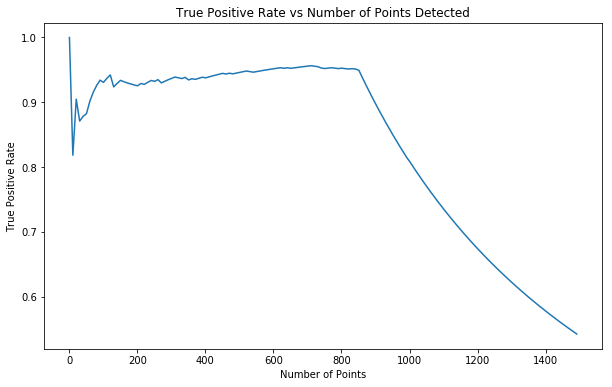

In [187]:
plt.figure(figsize=(10,6))
plt.title('True Positive Rate vs Number of Points Detected')
plt.ylabel('True Positive Rate')
plt.xlabel('Number of Points')
plt.plot(np.arange(1, 1500, 10), tpr)
plt.savefig('../figures/tpr_vs_points.PNG')

In [164]:
matches = overlap(im, mass_f0, top=150, radius=mpl.rcParams['lines.markersize']**2)

Out of top 150 points, 140 matches.
Precision


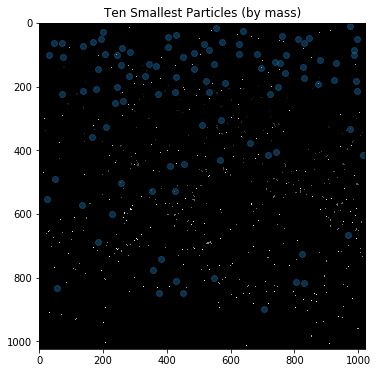

In [46]:
plt.figure(figsize=(10,6))
plt.title("Ten Smallest Particles (by mass)")
plt.imshow(frames[0])
plt.scatter(mass_f0.sort_values(by=['mass'])['x'][:100], mass_f0.sort_values(by=['mass'])['y'][:100], alpha=0.4)

In [47]:
size_f0 = t[t['frame']==0].sort_values(by=['size'], ascending=False)

In [48]:
size_f0.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
195,255.523921,158.109405,5983.071754,4.443119,0.370031,408.766467,8380.0,0.000025,0,487
197,264.491101,428.407548,6167.803921,4.372040,0.728701,421.921146,8425.0,0.000024,0,489
116,171.912636,301.015040,5832.015565,4.323633,0.122375,390.714200,8031.0,0.000026,0,461
254,327.483758,904.496010,6867.956644,4.243361,0.502945,438.718659,10425.0,0.000020,0,760
278,348.434346,953.401272,12653.829643,4.232137,0.553847,710.595514,19542.0,0.000011,0,838
690,758.999949,455.102546,21387.443557,4.201856,0.798741,1363.796153,28094.0,0.000007,0,369
514,584.066962,117.629992,7411.305595,4.201802,0.789863,492.106417,9600.0,0.000021,0,167
345,410.717258,236.951531,6732.443214,4.172634,0.551512,453.532851,9015.0,0.000023,0,663
327,395.916137,846.262717,12293.917629,4.170369,0.746822,521.977657,17580.0,0.000012,0,673
697,766.389385,965.705369,11528.922458,4.164040,0.550954,807.494902,18972.0,0.000011,0,403


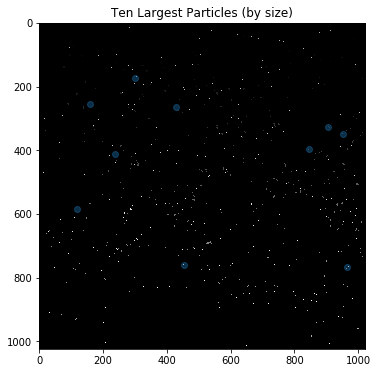

In [49]:
plt.figure(figsize=(10,6))
plt.title("Ten Largest Particles (by size)")
plt.imshow(frames[0])
plt.scatter(size_f0['x'][:10], size_f0['y'][:10], alpha=0.4)

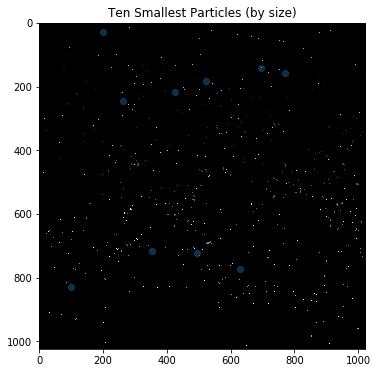

In [50]:
plt.figure(figsize=(10,6))
plt.title("Ten Smallest Particles (by size)")
plt.imshow(frames[0])
plt.scatter(size_f0.sort_values(['size'])['x'][:10], size_f0.sort_values(['size'])['y'][:10], alpha=0.4)

(array([887.,  14., 422., 126., 179.,  62.,  79.,  66.,  69.,  62.,  62.,
         76.,  63.,  76.,  56.,  72.,  57.,  61.,  47.,  44.,  53.,  55.,
         38.,  34.,  46.,  43.,  30.,  28.,  39.,  26.,  25.,  20.,  15.,
         11.,  20.,  17.,  15.,  14.,  11.,  14.,   8.,   5.,   6.,   5.,
          2.,   0.,   0.,   1.,   0.,   1.]),
 array([1.23479725, 1.30832566, 1.38185406, 1.45538247, 1.52891087,
        1.60243928, 1.67596768, 1.74949609, 1.82302449, 1.8965529 ,
        1.9700813 , 2.04360971, 2.11713811, 2.19066652, 2.26419492,
        2.33772333, 2.41125173, 2.48478014, 2.55830854, 2.63183695,
        2.70536535, 2.77889376, 2.85242217, 2.92595057, 2.99947898,
        3.07300738, 3.14653579, 3.22006419, 3.2935926 , 3.367121  ,
        3.44064941, 3.51417781, 3.58770622, 3.66123462, 3.73476303,
        3.80829143, 3.88181984, 3.95534824, 4.02887665, 4.10240505,
        4.17593346, 4.24946187, 4.32299027, 4.39651868, 4.47004708,
        4.54357549, 4.61710389, 4.6906323 , 4.

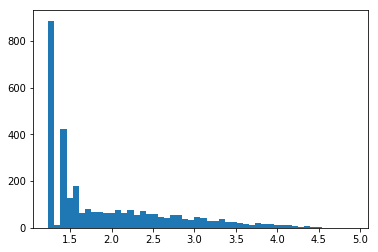

In [51]:
plt.figure()
plt.hist(t['size'], bins=50)

(array([240., 565., 421., 248., 243., 259., 162., 136., 156., 124., 107.,
         70.,  60.,  44.,  42.,  43.,  32.,  29.,  26.,  18.,  12.,  15.,
         15.,  16.,  10.,   6.,   7.,   6.,   4.,   5.,   3.,   5.,   7.,
          3.,   2.,   1.,   2.,   1.,   4.,   4.,   1.,   1.,   2.,   1.,
          0.,   0.,   2.,   1.,   0.,   1.]),
 array([ 1006.79030053,  1883.69539618,  2760.60049183,  3637.50558748,
         4514.41068312,  5391.31577877,  6268.22087442,  7145.12597006,
         8022.03106571,  8898.93616136,  9775.84125701, 10652.74635265,
        11529.6514483 , 12406.55654395, 13283.4616396 , 14160.36673524,
        15037.27183089, 15914.17692654, 16791.08202219, 17667.98711783,
        18544.89221348, 19421.79730913, 20298.70240478, 21175.60750042,
        22052.51259607, 22929.41769172, 23806.32278737, 24683.22788301,
        25560.13297866, 26437.03807431, 27313.94316996, 28190.8482656 ,
        29067.75336125, 29944.6584569 , 30821.56355255, 31698.46864819,
        32

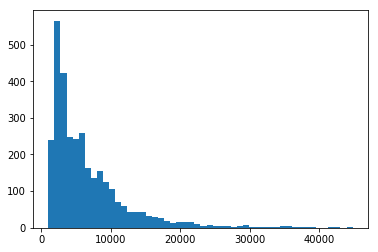

In [52]:
plt.figure()
plt.hist(t['mass'], bins=50)

In [255]:
def check_overlap(image, x, y, radius=10):
    indices = np.argwhere(image==1.)[...,:2]
#     print(indices)
    for i,j in indices:
        if (abs(i-x) < radius and abs(j-y) < radius):
            return True
    return False

In [238]:
mass_f0['x'][:10]

520    287.125633
757    965.502844
620    537.535568
614    306.693260
492    485.447402
827    891.128797
540    424.490233
443    996.469280
546    110.237797
508    933.388246
Name: x, dtype: float64

In [253]:
x,y = mass_f0['x'][:10], mass_f0['y'][:10]
# for i,j in zip(x,y):
#     print(check_overlap(frames[0]>0, i,j, radius=36))

In [207]:
len(t.index)

3162

In [326]:
mask = [check_overlap(frames[0]>0, t['x'][i], t['y'][i]) for i in range(len(t.index))]

In [327]:
mask1 = []
for i in range(len(mask)):
    if mask[i]:
        mask1.append(i)

In [328]:
truepts = t.iloc[mask1]

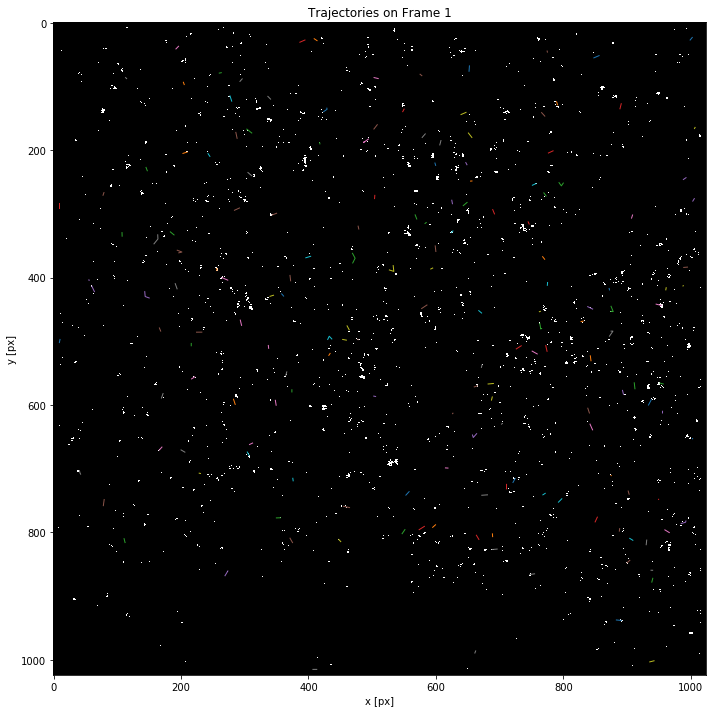

In [340]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 1')
tp.plot_traj(truepts, superimpose=frames[0]>0, ax=ax)
plt.savefig('../figures/truepts_frame1.PNG')

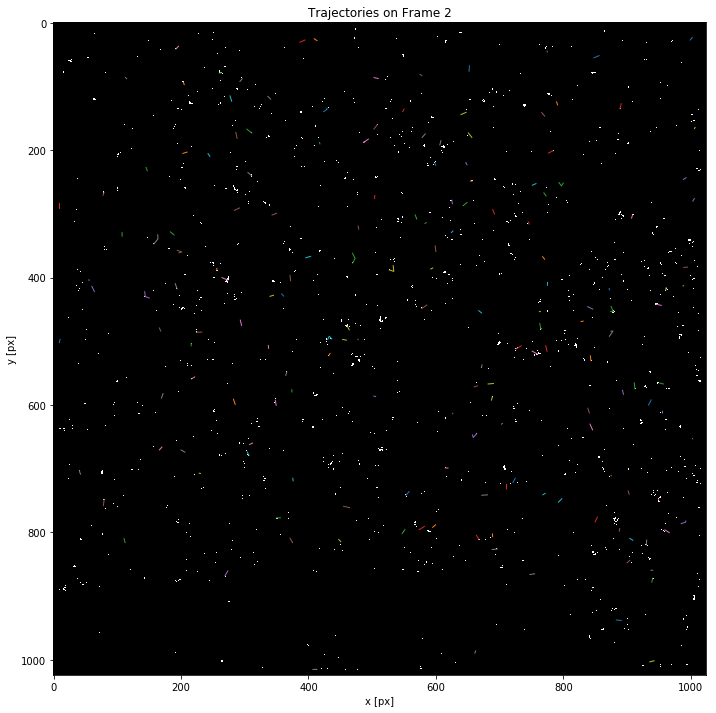

In [341]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 2')
tp.plot_traj(truepts, superimpose=frames[1]>0, ax=ax)
plt.savefig('../figures/truepts_frame2.PNG')

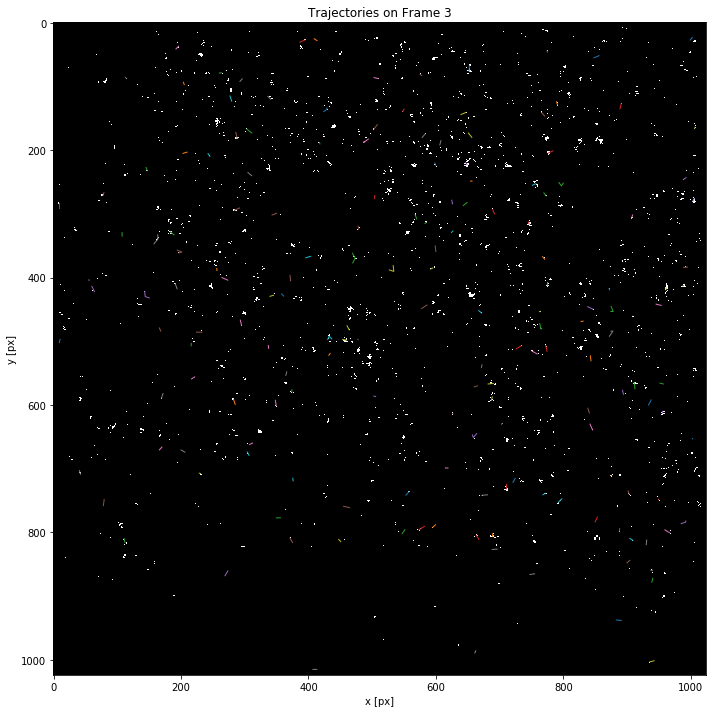

In [342]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 3')
tp.plot_traj(truepts, superimpose=frames[2]>0, ax=ax)
plt.savefig('../figures/truepts_frame3.PNG')

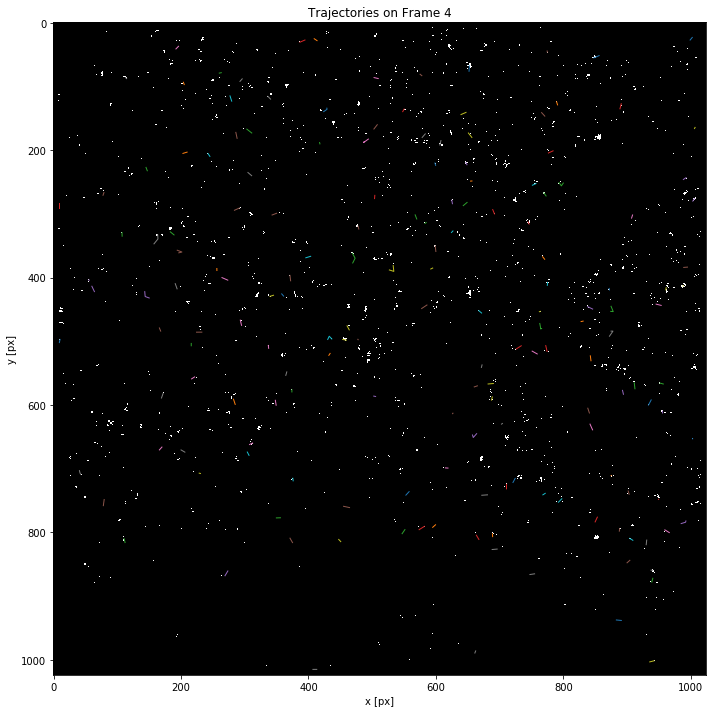

In [343]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 4')
tp.plot_traj(truepts, superimpose=frames[3]>0, ax=ax)
plt.savefig('../figures/truepts_frame4.PNG')

In [333]:
truepts1 = tp.filter_stubs(truepts, 3)


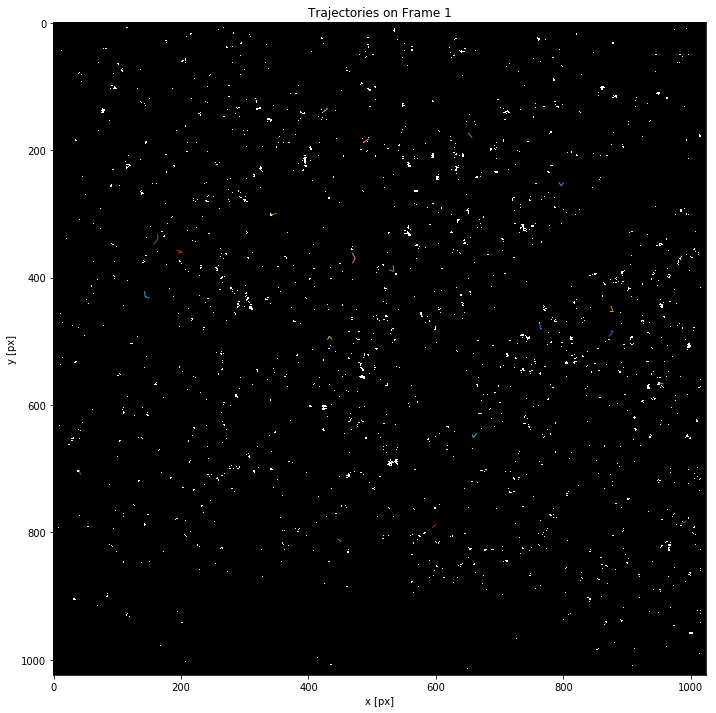

In [344]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 1')
tp.plot_traj(truepts1, superimpose=frames[0]>0, ax=ax)
plt.savefig('../figures/truepts_frame1_persistence.PNG')

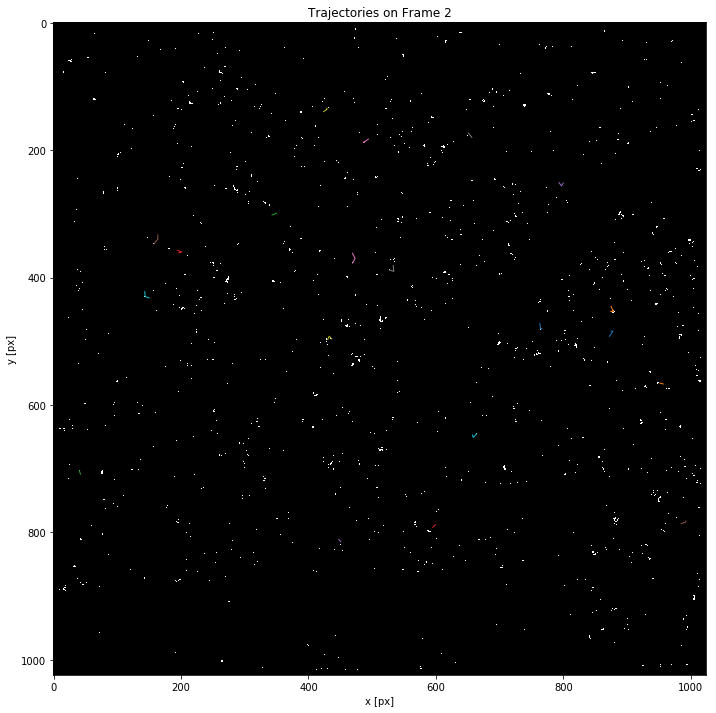

In [345]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 2')
tp.plot_traj(truepts1, superimpose=frames[1]>0, ax=ax)
plt.savefig('../figures/truepts_frame2_persistence.PNG')

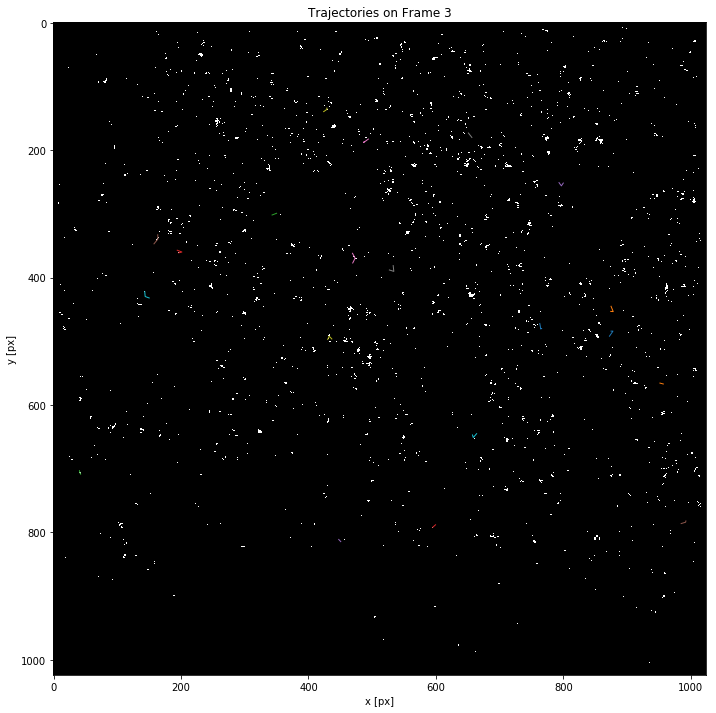

In [346]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 3')
tp.plot_traj(truepts1, superimpose=frames[2]>0, ax=ax)
plt.savefig('../figures/truepts_frame3_persistence.PNG')

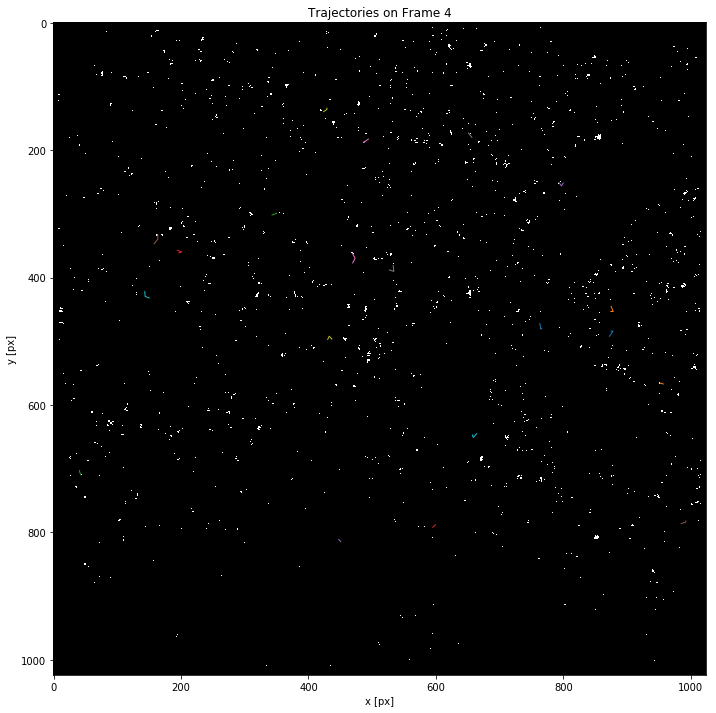

In [347]:
plt.figure(figsize=(20,12))
ax = plt.gca()
plt.title('Trajectories on Frame 4')
tp.plot_traj(truepts1, superimpose=frames[3]>0, ax=ax)
plt.savefig('../figures/truepts_frame4_persistence.PNG')

In [338]:
import imageio
filenames = ["truepts_frame1_persistence.PNG", "truepts_frame2_persistence.PNG", "truepts_frame3_persistence.PNG", "truepts_frame4_persistence.PNG"]
images = []
for filename in filenames:
    images.append(imageio.imread("../figures/" + filename))
imageio.mimsave('../figures/persistence.gif', images, duration=1)

In [339]:
import imageio
filenames = ["truepts_frame1.PNG", "truepts_frame2.PNG", "truepts_frame3.PNG", "truepts_frame4.PNG"]
images = []
for filename in filenames:
    images.append(imageio.imread("../figures/" + filename))
imageio.mimsave('../figures/points.gif', images, duration=1)